In [1]:
# Imports

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dataset_directory = '../dataset'
test_samples = '../test samples'

In [4]:
# Get the class names

In [5]:
class_names = os.listdir(dataset_directory)
class_names

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [6]:
# Exploring the dataset

In [7]:
# Find the size of training dataset

In [8]:
dataset_directory_size = 0
for root_dir, cur_dir, files in os.walk(dataset_directory):
    dataset_directory_size += len(files)
print('Size of dataset:', dataset_directory_size)

Size of dataset: 63120


In [9]:
# Find the number of features of an image

In [10]:
path_to_all_files = os.path.join(dataset_directory, class_names[0])
print(path_to_all_files)
files = os.listdir(path_to_all_files)

path_to_a_file = os.path.join(path_to_all_files, files[0])
print(path_to_a_file)

img_matrix = plt.imread(path_to_a_file)
print(type(img_matrix))
print(img_matrix.shape)

img_matrix = img_matrix.reshape(1, img_matrix.shape[0] * img_matrix.shape[1])
print(img_matrix.shape)

num_features = img_matrix.shape[1]
print(num_features)

../dataset\0
../dataset\0\0002d687-12e0-4ff1-9ce5-b617c94af382.jpg
<class 'numpy.ndarray'>
(28, 28)
(1, 784)
784


In [11]:
X = np.zeros((dataset_directory_size, num_features))
y = np.zeros((dataset_directory_size))
print(X.shape)
print(y.shape)

(63120, 784)
(63120,)


In [12]:
i = 0

for class_name in class_names:
        
    path = os.path.join(dataset_directory, class_name)
    files = os.listdir(path)

    for file in files:
        
        path_to_file = os.path.join(path, file)
        
        img_matrix = plt.imread(path_to_file)            
        img_matrix = img_matrix.reshape(1, img_matrix.shape[0] * img_matrix.shape[1])
        # Standardize the array
        img_matrix = img_matrix / 255 
      
        X[i] = img_matrix
        y[i] = class_names.index(class_name)
        
        i += 1

In [13]:
print(X.shape)
print(y.shape)

(63120, 784)
(63120,)


In [14]:
# Train Test Split

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [16]:
# Training the classifier

In [17]:
from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=80)
classifier.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=80)

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [19]:
predictions = classifier.predict(X_test)
accuracy_score(y_test, predictions)

0.9826520912547528

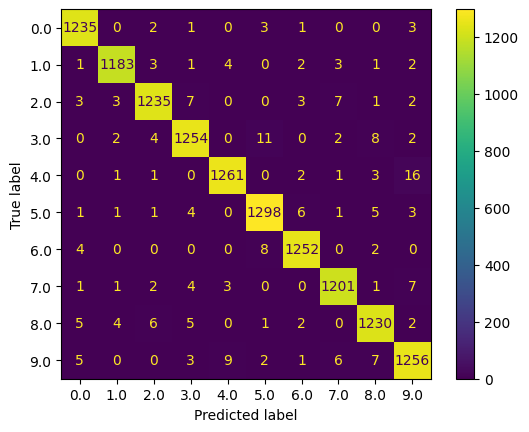

In [20]:
cm = confusion_matrix(y_test, predictions, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()
plt.show()

In [21]:
# Loss curve

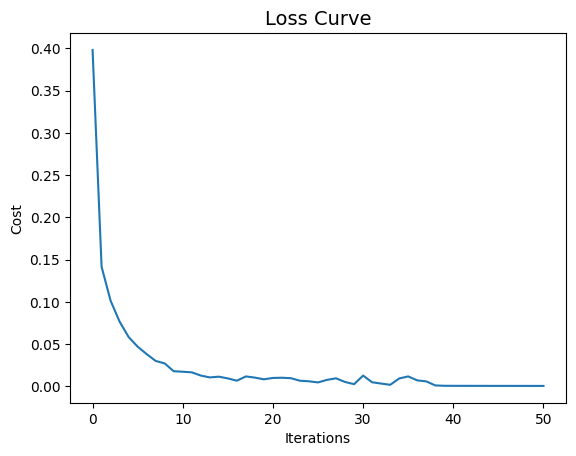

In [22]:
plt.plot(classifier.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [23]:
from PIL import Image

In [24]:
def predict(path):
    
    img = plt.imread(path)
            
    new_size = (28, 28)
    img_resized = Image.open(path_to_file).resize(new_size)
    img_converted = img_resized.convert('L')

    img_array = np.array(img_converted)
    img_array = img_array.reshape(1, img_array.shape[0] * img_array.shape[1])
    img_array = img_array / 255 


    predicted_class = classifier.predict(img_array)
    predicted_class_integer = predicted_class.astype(np.int8)

    print(class_names[predicted_class_integer[0]])
    
test_sample_files = os.listdir(test_samples)
length_test_sample_files = len(test_sample_files)

for i in range(0, length_test_sample_files):
    path_to_file = os.path.join(test_samples, test_sample_files[i])
    predict(path_to_file)

0
1
2
3
4
5
6
7
8
9


In [25]:
# Save the model

In [26]:
import pickle

In [27]:
with open('../model/model.pkl','wb') as f:
    pickle.dump(classifier,f)